<h2><font color="#004D7F" size=6> Análisis de datos</font></h2>



<h1><font color="#004D7F" size=5>1. Cargar el conjunto de datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Nancy Raquel Rodríguez Ramos</font><br>
<font color="#004D7F" size=3>Propuesta para exploración inicial de datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Cargar CSV](#section2)
    * [2.1. Desde Pandas](#section2)
* [3. Descripción del conjunto de datos](#section3)
* [4. Distribución entre clases: _groupby('class').size()_](#section4)
* [5.Correlaciones](#section5)
* [6.Asimetría](#section6)
* [7. Visualización Univariable](#section7)
    * [7.1. Histogramas](#section71)
    * [7.3. Boxplot](#section73)
    * [7.4. Valores únicos en cada variable del dataframe](#section74)
* [8.Valores nulos](#section8)
* [9.Dispersión por clase](#section9)
* [10.Informe HTML de la base](#section10)

In [20]:
import os

# Load libraries
import os
%matplotlib inline
from itertools import cycle, islice
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import read_csv
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import norm
from sklearn import cluster, datasets
from sklearn import datasets, metrics, model_selection, svm
from sklearn import preprocessing
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # for Support Vector Classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt   
import missingno as msno
import multiprocessing
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import scipy.cluster.hierarchy as sch
import scipy.stats                
import seaborn as sns
import time
import warnings
pd.set_option('display.max_columns', 60)
warnings.filterwarnings('ignore')

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Eeste ar

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Carga CSV</font>

Debe poder cargar sus datos antes de comenzar su proyecto de aprendizaje automático. El formato más común para los datos de aprendizaje automático son los archivos CSV. Hay varias formas de cargar un archivo CSV en Python:
* Cargue archivos CSV con la biblioteca estándar de Python.
* Cargue archivos CSV con NumPy.
* Cargue archivos CSV con Pandas.

Sin embargo aca lo cargaremos con Pandas

<a id="section21"></a>
## <font color="#004D7F">2.1. Desde Pandas</font>

Puede cargar sus datos CSV usando Pandas y la función `pandas.read_csv()`. Esta función es muy flexible y es quizás mi enfoque recomendado para cargar sus datos de aprendizaje automático. La función devuelve un pandas. [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) que puede comenzar a resumir y trazar de inmediato. El siguiente ejemplo supone que el archivo `df_prediction.scv` que no está en el directorio de trabajo actual y por eso agrego primero la dirección. Tenga en cuenta que en este ejemplo especificamos explícitamente los nombres de cada atributo al DataFrame...
Hay que tener seguridad del separador del archivo en caso de ser .csv, en este caso es un "|" y header=0 es que esté el encabezado.

In [3]:
#dirección donde subí la base que necesito leer
import os
os.chdir('C:\\Users\\114310416\\Documents\\Seguros_propensión al consumo\\Modelo de Propensión BCR Seguros')

In [4]:
import pandas as pd
df=pd.read_csv("df_prediction.csv", sep="|", header=0)

C:\Users\114310416\AppData\Local\Temp\ipykernel_28024\3508009776.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("df_prediction.csv", sep="|", header=0)


Muchos conjuntos de datos ya vienen ya por defecto en Python a través de la librería [scikit-learn](https://scikit-learn.org/stable/datasets/index.html), lo que significa que no necesita cargar el paquete explícitamente. Estos conjunto de datos se encuentran dentro del módulo `datasets` y de ahí podrán cargarse de manera muy sencillo cargarlo

<a id="section3"></a>
# <font color="#004D7F"> 3. Descripción de conjuntos de datos</font>

In [5]:
df.shape

(2370923, 73)

Para visualizar cuales columnas tiene el archivo

In [6]:
df.columns

Index(['CEDULA_SICC', 'GENERATION', 'student_segmentation', 'age_range',
       'FLAG_TEL_CASA', 'FLAG_TEL_CELULAR', 'FLAG_TEL_EMAIL', 'ESTADO_CIVIL',
       'PROVINCIA', 'ANTIGUEDAD_YEARS', 'RANGO_ANTIGUEDAD', 'CANT_CDP_ACTIVO',
       'SUM_CDP_ACTIVO', 'COLONES_CDP', 'DOLARES_CDP', 'Fisico', 'Electronico',
       'SALDO_DOLARES', 'NULOS', 'CORRIENTE', 'PENSIONADO', 'COMUN',
       'TipoCliente', 'Cuenta Corriente', 'Cuenta Ahorro', 'ColonesCuentas',
       'DolaresCuenta', 'OFICINA', 'TIPO_CARTERA', 'MONTO_ORIGINAL_USD',
       'AVG_MESES_PERIODO', 'CRC_PRESTAMOS', 'USD_PRESTAMOS', 'HIPOTECA',
       'GARANT LIBERADA', 'SEGURIDADES', 'BIEN AD BCR TER', 'PRENDA S/VEHIC',
       'PRENDA S/GANAD', 'CED HIPOTECARIA', 'PRENDA S/MAQUIN',
       'CONTRATO ACEPTA', 'PRENDA S/COSECH', 'CODEUDOR',
       'AVG_LIMITE_CREDITO_APROBADO', 'AVG_SALDO_TARJETA',
       'AVG_LIMITE_DISPONIBLE', 'DEBITO', 'CREDITO', 'DEBITO INTERNACIONAL',
       'DEBITO MASTERCARD    ', 'OTRAS', 'NOMBRE', 'CEDULA',
  

Cambios de nombres que se escribe el nombreactual:nombreacambiar

In [7]:
#df = df.rename(columns={'5.1':'sepal.length','3.5':'Sepal.width', '1.4':'Petal.lenght', '0.2':'Petal.Width', 'Iris-setosa':'class'})


Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

In [8]:
df=pd.DataFrame(df)

Los siguientes comandos nos muestran las 5 primeros filas y las 5 últimas filas.

In [9]:
df.head(5)

,CEDULA_SICC,GENERATION,student_segmentation,age_range,FLAG_TEL_CASA,FLAG_TEL_CELULAR,FLAG_TEL_EMAIL,ESTADO_CIVIL,PROVINCIA,ANTIGUEDAD_YEARS,...,BCR Fondo Inmob Comercio y la Industria,BCR Corto Plazo Colones,BCR Fondo Inmobiliario,BCR Fondo Inmob. Rentas Mixtas,MONTO_ASEGURADO,PRIMA,PRIMA_USD,MONTO_ASEGURADO_USD,PRESTAMO_CRC,PRESTAMO_USD
0,1455449.0,Baby Boomers Generation,Posgrados,65 +,0,1,1,DIVORCIADO,SAN JOSE,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1166383.0,The Silent Generation,Posgrados,65 +,0,0,0,SOLTERO,SAN JOSE,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101660502.0,The Silent Generation,Posgrados,65 +,1,0,0,VIUDO,SAN JOSE,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101660552.0,The Silent Generation,Posgrados,65 +,1,1,0,CASADO,SAN JOSE,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101660688.0,The Silent Generation,Posgrados,65 +,1,0,0,SOLTERO,SAN JOSE,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


si por alguna razón nos sirve más ver los últimos 5

In [10]:
df.tail(5)

,CEDULA_SICC,GENERATION,student_segmentation,age_range,FLAG_TEL_CASA,FLAG_TEL_CELULAR,FLAG_TEL_EMAIL,ESTADO_CIVIL,PROVINCIA,ANTIGUEDAD_YEARS,...,BCR Fondo Inmob Comercio y la Industria,BCR Corto Plazo Colones,BCR Fondo Inmobiliario,BCR Fondo Inmob. Rentas Mixtas,MONTO_ASEGURADO,PRIMA,PRIMA_USD,MONTO_ASEGURADO_USD,PRESTAMO_CRC,PRESTAMO_USD
2370918,127600038433,Baby Boomers Generation,Posgrados,55 - 64,0,1,1,CASADO,PUNTARENAS,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370919,300000004970,Baby Boomers Generation,Posgrados,65 +,0,1,0,SOLTERO,PUNTARENAS,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370920,310000000490,Generation X (Baby Bust),Posgrados,55 - 64,0,1,1,SOLTERO,GUANACASTE,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370921,300000000049,Baby Boomers Generation,Posgrados,65 +,1,1,1,CASADO,LIMÃ“N,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370922,310000000014,Baby Boomers Generation,Posgrados,55 - 64,0,1,1,VIUDO,SAN JOSE,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora bien, estos conjuntos de datos nos interesa poder convertirlos a un Dataframe de Pandas para poder trabajar con ellos de manera correcta.

Con el siguiente comando podemos ver los tipos de datos registrados en cada variable, se debe tomar en cuenta para toma de decisiones de transformaciones o cambio de tipo de variable requerido en próximos análisis

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

CEDULA_SICC                                  object
GENERATION                                   object
student_segmentation                         object
age_range                                    object
FLAG_TEL_CASA                                 int64
FLAG_TEL_CELULAR                              int64
FLAG_TEL_EMAIL                                int64
ESTADO_CIVIL                                 object
PROVINCIA                                    object
ANTIGUEDAD_YEARS                              int64
RANGO_ANTIGUEDAD                             object
CANT_CDP_ACTIVO                             float64
SUM_CDP_ACTIVO                              float64
COLONES_CDP                                 float64
DOLARES_CDP                                 float64
Fisico                                      float64
Electronico                                 float64
SALDO_DOLARES                               float64
NULOS                                       float64
CORRIENTE   

Para cambiar tipo de variables, esto se requiere hacer para que el programa las lea tal como se deben utilizar en el análisis

In [12]:
df["FLAG_TEL_CASA"]= str(df["FLAG_TEL_CASA"])
df["FLAG_TEL_CELULAR"]= str(df["FLAG_TEL_CELULAR"])
df["FLAG_TEL_EMAIL"]= str(df["FLAG_TEL_EMAIL"])
df["ESTADO_CIVIL"]= str(df["ESTADO_CIVIL"])
df["PROVINCIA"]= str(df["PROVINCIA"])
df["Fisico"]= str(df["Fisico"])
df["CEDULA"]= str(df["CEDULA"])
df["Electronico"]= str(df["Electronico"])
df["CODEUDOR"]= str(df["CODEUDOR"])
df["COMUN"]= str(df["COMUN"])
df["PENSIONADO"]= str(df["PENSIONADO"])
df["PRENDA S/VEHIC"]= str(df["PRENDA S/VEHIC"])
df["GARANT LIBERADA"]= str(df["GARANT LIBERADA"])
df["SEGURIDADES"]= str(df["SEGURIDADES"])
df["Fondo Evolución"]= str(df["Fondo Evolución"])
df["GARANT LIBERADA"]= str(df["GARANT LIBERADA"])
df["Cuenta Corriente"]= str(df["Cuenta Corriente"])
df["Cuenta Ahorro"]= str(df["Cuenta Ahorro"])
df["CONTRATO ACEPTA"]= str(df["CONTRATO ACEPTA"])
df["CED HIPOTECARIA"]= str(df["CED HIPOTECARIA"])
df["CEDULA_SICC"]= str(df["CEDULA_SICC"])
df['OFICINA'] = df['OFICINA'].astype(str)

Verificación del cambio de tipo de variable

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes.head(15))

CEDULA_SICC              object
GENERATION               object
student_segmentation     object
age_range                object
FLAG_TEL_CASA            object
FLAG_TEL_CELULAR         object
FLAG_TEL_EMAIL           object
ESTADO_CIVIL             object
PROVINCIA                object
ANTIGUEDAD_YEARS          int64
RANGO_ANTIGUEDAD         object
CANT_CDP_ACTIVO         float64
SUM_CDP_ACTIVO          float64
COLONES_CDP             float64
DOLARES_CDP             float64
dtype: object


Cuando queremos un descriptivo estadístico de las variables numéricas, se puede obtener de la siguiente manera

In [14]:
df.describe()

,ANTIGUEDAD_YEARS,CANT_CDP_ACTIVO,SUM_CDP_ACTIVO,COLONES_CDP,DOLARES_CDP,SALDO_DOLARES,NULOS,CORRIENTE,TipoCliente,ColonesCuentas,...,BCR Fondo Inmob Comercio y la Industria,BCR Corto Plazo Colones,BCR Fondo Inmobiliario,BCR Fondo Inmob. Rentas Mixtas,MONTO_ASEGURADO,PRIMA,PRIMA_USD,MONTO_ASEGURADO_USD,PRESTAMO_CRC,PRESTAMO_USD
count,2.370923e+06,33470.000000,3.347000e+04,33470.000000,33470.000000,1.400065e+06,1400509.0,1.400509e+06,1.400509e+06,1.400509e+06,...,5833.000000,5833.000000,5833.000000,5833.000000,4.283300e+04,42833.000000,42833.000000,4.283300e+04,42833.000000,42833.000000
mean,1.130089e+01,2.469495,4.213642e+04,1.844876,0.644368,5.741937e+02,0.0,1.752841e-01,4.825352e+00,1.002700e+00,...,0.601920,3.062746,0.611692,0.134236,2.707305e+05,278.294936,24.839462,4.952386e+04,5.599047,0.309364
std,1.117758e+01,8.130932,1.350240e+05,7.201850,2.148272,4.986791e+03,0.0,6.300722e-01,2.733052e+00,2.204737e-01,...,4.032653,6.511531,4.015904,2.065786,4.860156e+06,431.564933,303.895321,4.854688e+06,3.383604,1.255429
min,0.000000e+00,1.000000,1.607000e+01,0.000000,0.000000,-9.612203e+05,0.0,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,5.000000e+00,1.000000,3.515990e+03,1.000000,0.000000,8.500000e-01,0.0,0.000000e+00,2.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,6.900000e+04,63.000000,0.110000,1.143500e+02,3.000000,0.000000
50%,1.000000e+01,1.000000,1.124787e+04,1.000000,0.000000,1.202000e+01,0.0,0.000000e+00,5.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,1.685460e+05,183.000000,0.310000,2.907300e+02,5.000000,0.000000
75%,1.500000e+01,2.000000,3.454703e+04,2.000000,1.000000,1.294500e+02,0.0,0.000000e+00,8.000000e+00,1.000000e+00,...,0.000000,1.000000,0.000000,0.000000,3.373620e+05,368.000000,0.660000,6.053600e+02,8.000000,0.000000
max,1.210000e+02,1276.000000,6.984631e+06,1177.000000,116.000000,1.545763e+06,0.0,1.300000e+01,8.000000e+00,2.000000e+00,...,63.000000,63.000000,63.000000,63.000000,1.000269e+09,35403.000000,35403.000000,1.000000e+09,100.000000,15.000000


<a id="section4"></a>
## <font color="#004D7F">4. Distribución entre clases: _groupby('class').size()_ </font>

Puede ver que hay casi el doble de observaciones con la clase 0 (sin aparición de diabetes) que con la clase 1 (aparición de diabetes). En este caso podemos observar que las clases se encuentran desbalanceadas por lo que los tenemos que analizar muy los resultados de los algoritmos.

In [15]:
df.groupby("GENERATION").size()

GENERATION
Baby Boomers Generation      344989
Gen Alpha                     13925
Generation X (Baby Bust)     548223
Millenials - Generation Y    577393
The Greatest Generation         783
The Silent Generation         64020
Xennials                     335508
iGen / Gen Z                 486082
dtype: int64

In [16]:
df.groupby("student_segmentation").size()

student_segmentation
Maternal            1296
Posgrados        2037189
Pre primaria        3952
Primaria           22766
Secundaria         36139
Universitario     269581
dtype: int64

In [17]:
df.groupby("age_range").size()

age_range
18 - 24    257310
25 - 34    614621
35 - 44    557677
45 - 54    362922
55 - 64    268820
65 +       233149
<18         76424
dtype: int64

NameError: name 'plt' is not defined

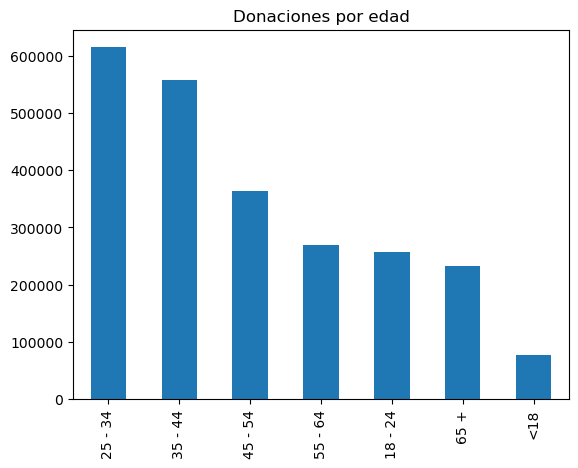

In [18]:
# Gráfico de barras de donaciones por edad
pd.value_counts(df["age_range"]).plot(kind='bar', title='Donaciones por edad')
plt.show(abs)

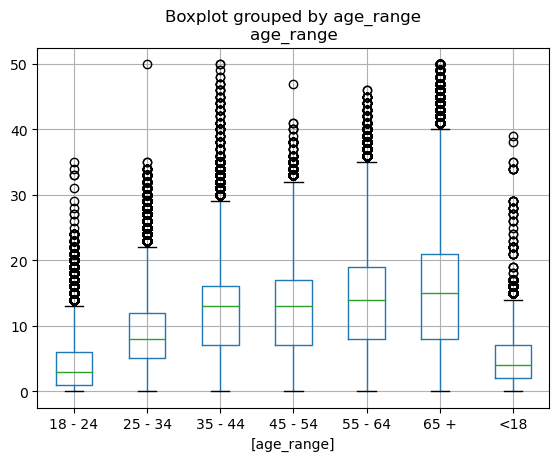

In [42]:
# Comparación rango de edad
df[df.ANTIGUEDAD_YEARS <= 50][['ANTIGUEDAD_YEARS', 
                                               'age_range']].boxplot(by='age_range')
plt.title('age_range')
plt.show()

Por ejemplo en ese gráfico se ve extraño el hecho de que hay personas supuestamente con hasta 50 años de antiguedad en el BCR, con un rango de edad de 35-40, hay personas con más de 30 años de antiguedad con edades desde 18 a 24, hay menores de edad con más de 20 años de antiguedad

<a id="section5"></a>
## <font color="#004D7F"> 5. Correlaciones: _corr()_ </font>

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [30]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int',"uint8","int32"]).corr(method='spearman')
tidy=tidy_corr_matrix(corr_matrix)

In [39]:
tidy.head(15)

,variable_1,variable_2,r,abs_r
1740,PRESTAMO_USD,USD_PRESTAMOS,0.967422,0.967422
605,USD_PRESTAMOS,PRESTAMO_USD,0.967422,0.967422
906,CREDITO,AVG_LIMITE_DISPONIBLE,0.952795,0.952795
830,AVG_LIMITE_DISPONIBLE,CREDITO,0.952795,0.952795
1597,PRIMA,PRIMA_USD,0.940153,0.940153
1638,PRIMA_USD,PRIMA,0.940153,0.940153
1556,MONTO_ASEGURADO,MONTO_ASEGURADO_USD,0.936189,0.936189
1679,MONTO_ASEGURADO_USD,MONTO_ASEGURADO,0.936189,0.936189
1681,MONTO_ASEGURADO_USD,PRIMA_USD,0.905416,0.905416
1640,PRIMA_USD,MONTO_ASEGURADO_USD,0.905416,0.905416


Si se quiere extraer el cuadro de correlaciones porque es muy grande, se puede exportar a excel para ver con mayor claridad

In [33]:
#tidy.to_excel("corr.xlsx")

Con la siguiente matriz de correlación se puede ver un mapa de calor según el nivel de correlación, que obtuvimos en la estimación anterior

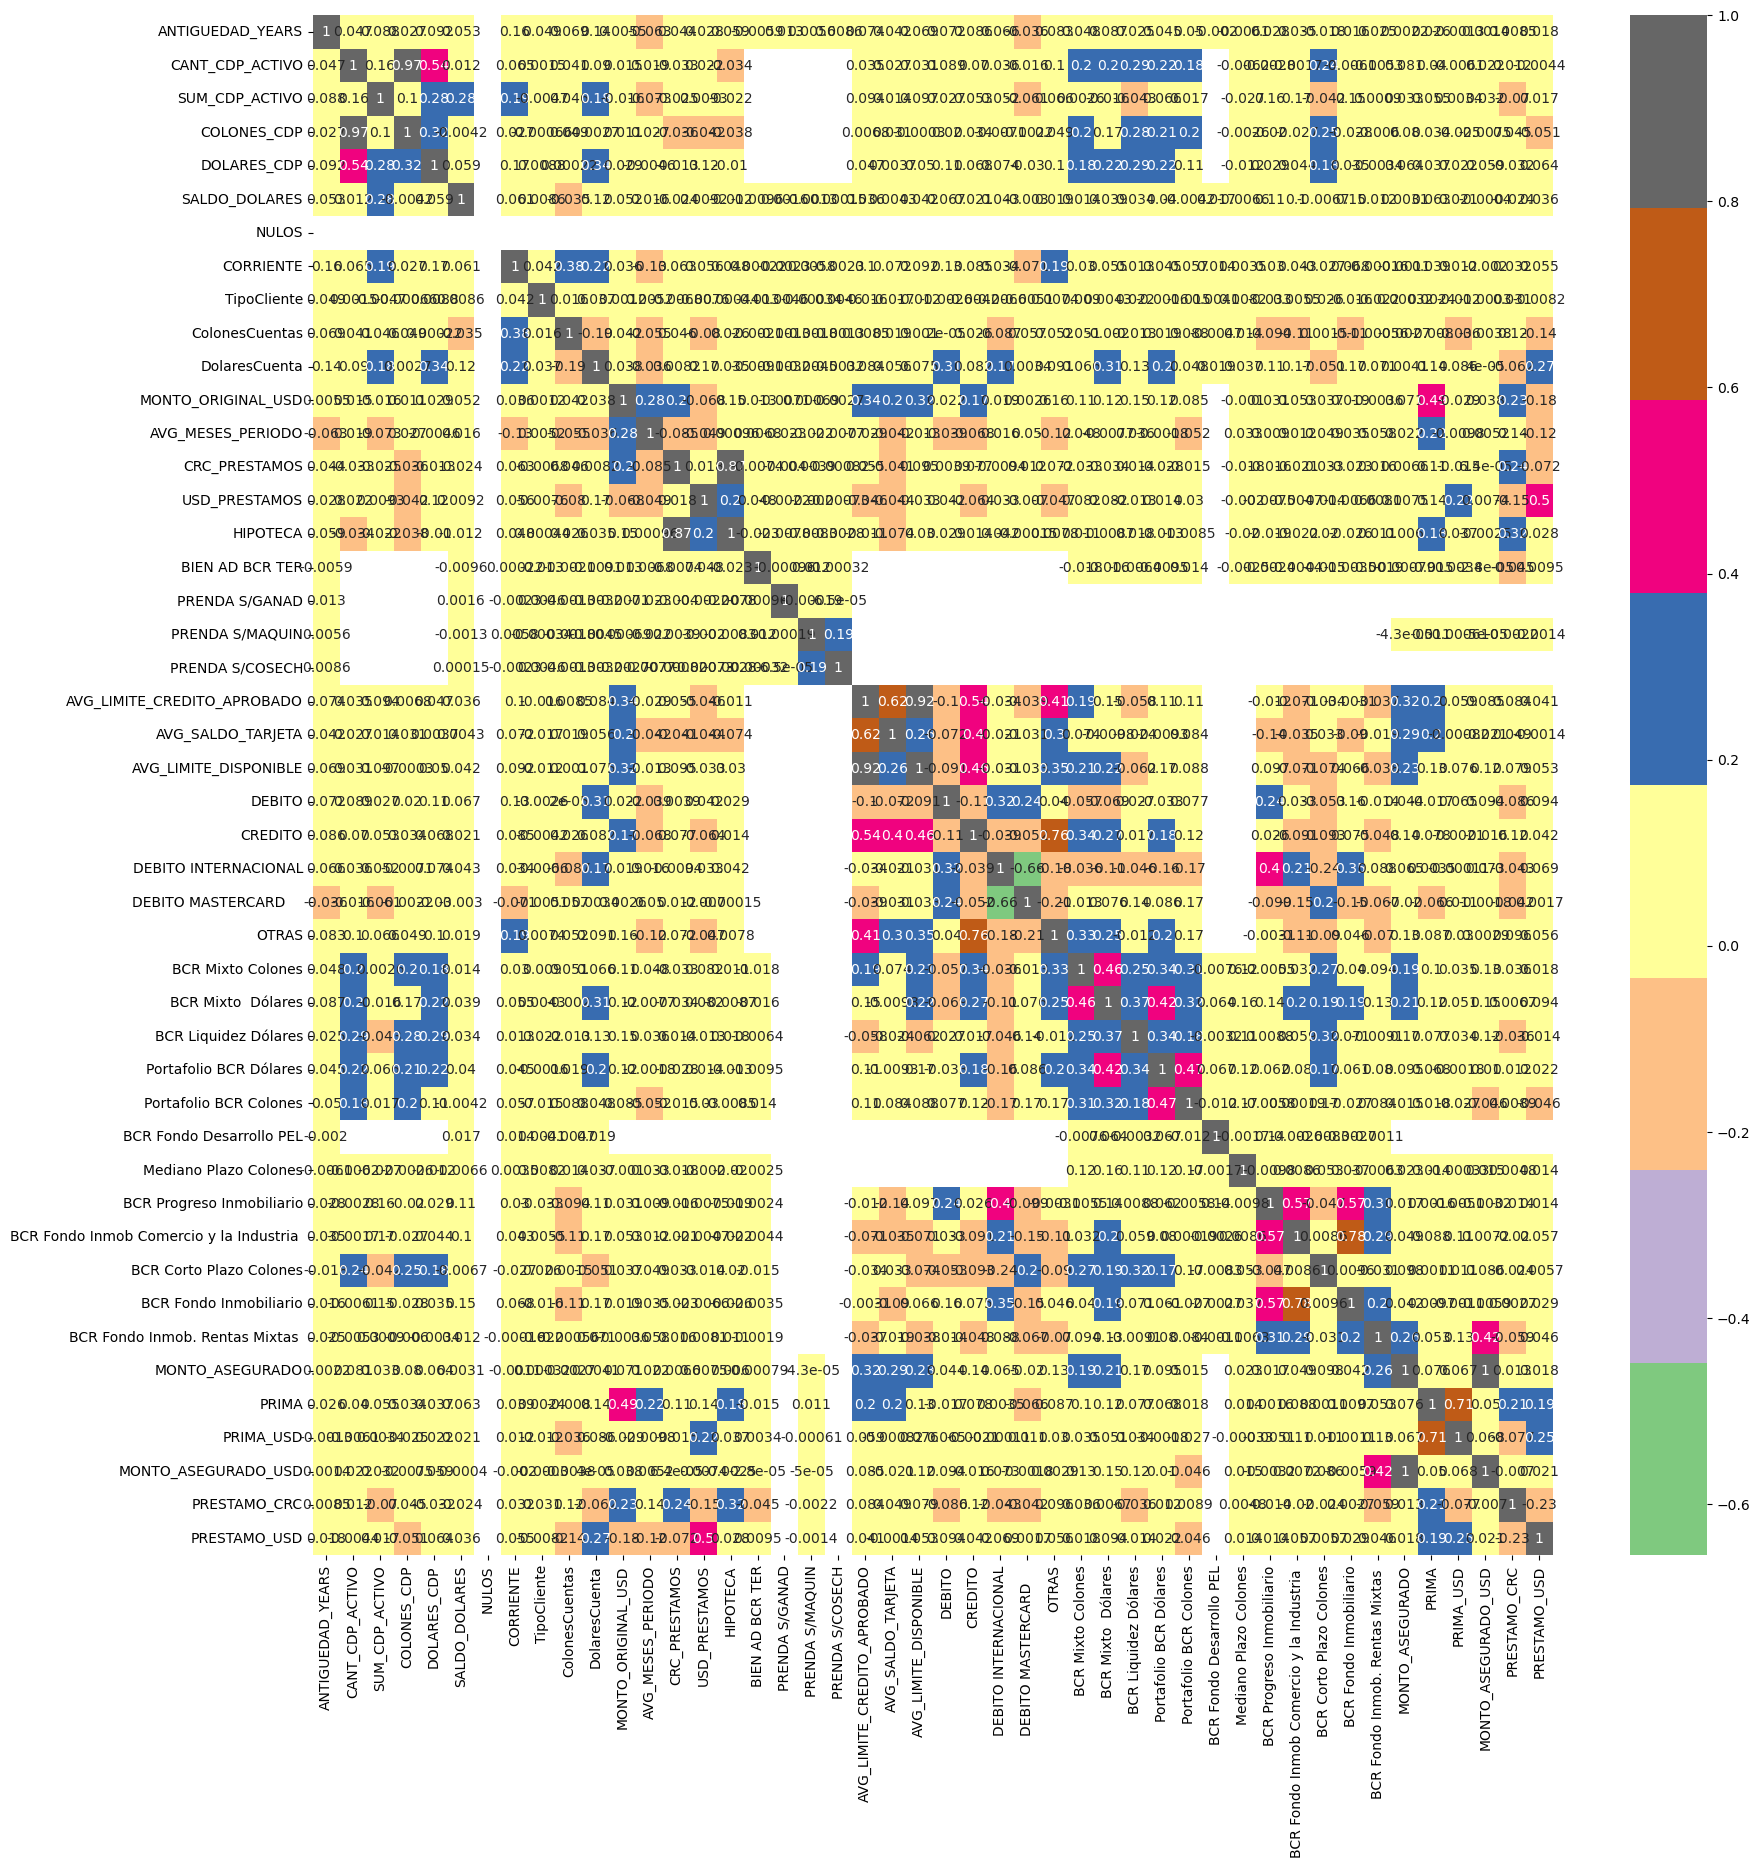

In [32]:
#Matriz de correlación de variables continuas.
top_corr_features=corr_matrix.index
plt.figure(figsize=(20,20))
fig=sns.heatmap(df[top_corr_features].corr(),annot=True,
                cmap="Accent")

In [36]:
continuos= df.select_dtypes(include=['float64', 'int',"uint8","int32"])
continuos.columns

Index(['ANTIGUEDAD_YEARS', 'CANT_CDP_ACTIVO', 'SUM_CDP_ACTIVO', 'COLONES_CDP',
       'DOLARES_CDP', 'SALDO_DOLARES', 'NULOS', 'CORRIENTE', 'TipoCliente',
       'ColonesCuentas', 'DolaresCuenta', 'MONTO_ORIGINAL_USD',
       'AVG_MESES_PERIODO', 'CRC_PRESTAMOS', 'USD_PRESTAMOS', 'HIPOTECA',
       'BIEN AD BCR TER', 'PRENDA S/GANAD', 'PRENDA S/MAQUIN',
       'PRENDA S/COSECH', 'AVG_LIMITE_CREDITO_APROBADO', 'AVG_SALDO_TARJETA',
       'AVG_LIMITE_DISPONIBLE', 'DEBITO', 'CREDITO', 'DEBITO INTERNACIONAL',
       'DEBITO MASTERCARD    ', 'OTRAS', 'BCR Mixto Colones',
       'BCR Mixto  Dólares', 'BCR Liquidez Dólares', 'Portafolio BCR Dólares',
       'Portafolio BCR Colones', 'BCR Fondo Desarrollo PEL',
       'Mediano Plazo Colones', 'BCR Progreso Inmobiliario',
       'BCR Fondo Inmob Comercio y la Industria ', 'BCR Corto Plazo Colones',
       'BCR Fondo Inmobiliario', 'BCR Fondo Inmob. Rentas Mixtas ',
       'MONTO_ASEGURADO', 'PRIMA', 'PRIMA_USD', 'MONTO_ASEGURADO_USD',
       'P

Opciones para analizar las relaciones entre pares, 
Gráficos de dispersión y de distribución respecto a alguna categoría

In [ ]:
#sns.pairplot(continuos, palette = 'coolwarm')

<a id="section6"></a>
## <font color="#004D7F">6. Asimetría: _skew()_ </font>

Puede calcular el sesgo de cada atributo utilizando la función `skew()`. El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [40]:
df.skew()

ANTIGUEDAD_YEARS                              6.218813
CANT_CDP_ACTIVO                             118.216901
SUM_CDP_ACTIVO                               18.861872
COLONES_CDP                                 131.660771
DOLARES_CDP                                  16.134441
SALDO_DOLARES                                61.455238
NULOS                                         0.000000
CORRIENTE                                     3.992508
TipoCliente                                   0.114973
ColonesCuentas                                0.215176
DolaresCuenta                                 2.446957
MONTO_ORIGINAL_USD                           64.722959
AVG_MESES_PERIODO                            -0.316462
CRC_PRESTAMOS                                10.692615
USD_PRESTAMOS                                13.186757
HIPOTECA                                      7.432553
BIEN AD BCR TER                              25.157587
PRENDA S/GANAD                               80.683409
PRENDA S/M

* Si una distribución parece casi
gaussiana pero se empuja hacia
la izquierda o hacia la derecha,
es útil conocer el sesgo.
* Valores cercanos a cero tienen
un menor sesgo, sin embargo,
sesgo a la izquierda será con
valores negativos y sesgo a la
derecha serán valores positivos.

Visualización de la asimetría 

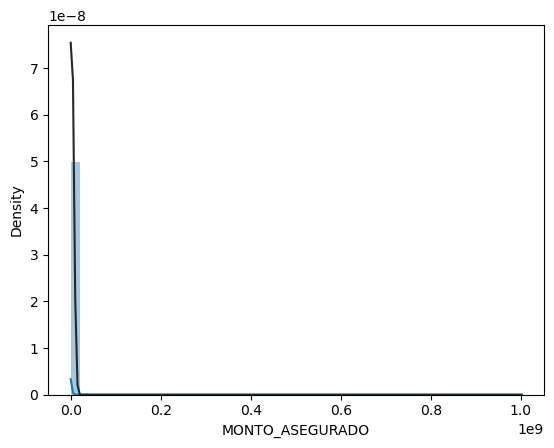

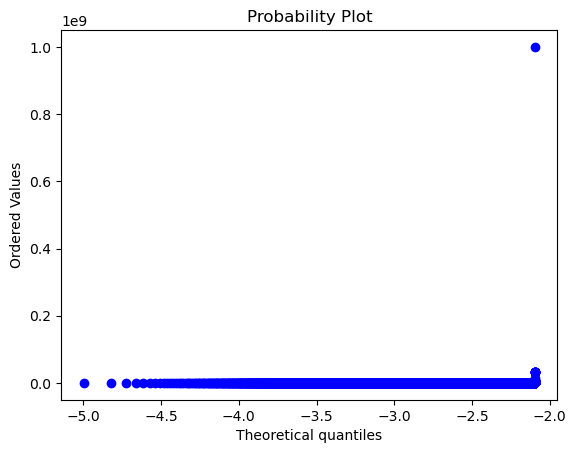

In [41]:
import seaborn as sns
#histogram and normal probability plot
sns.distplot(df['MONTO_ASEGURADO'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['MONTO_ASEGURADO'], plot=plt)

<a id="section7"></a>
# <font color="#004D7F"> 7. Visualización Univariable</font>

Las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="section71"></a>
## <font color="#004D7F">7.1. Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que [Matplotlib](https://www.datacamp.com/community/tutorials/histograms-matplotlib) es una pontente librería de visualización de datos

In [40]:
#Histograma aplicado en cada una de las variables.
cuantitativos.hist(bins=33, figsize=(15, 15))

NameError: name 'cuantitativos' is not defined

<a id="section73"></a>
## <font color="#004D7F">7.3. Boxplot </font>

<AxesSubplot:>

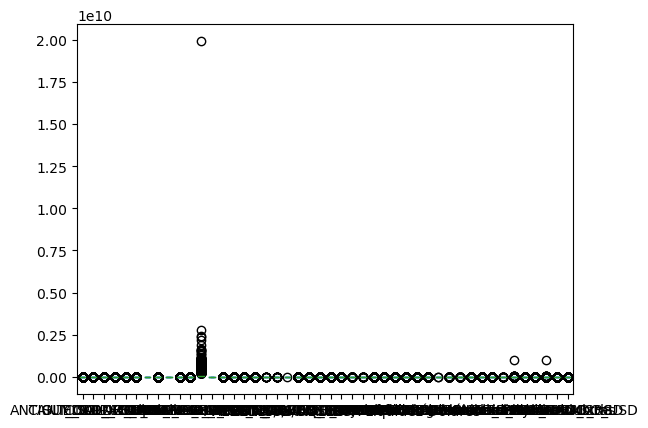

In [45]:
%matplotlib inline
# Univariate Boxplot
df.plot(kind="box")

<a id="section74"></a>
## <font color="#004D7F">7.4. Valores únicos en cada variable del dataframe (categóricos) </font>

In [46]:
df.columns

Index(['CEDULA_SICC', 'GENERATION', 'student_segmentation', 'age_range',
       'FLAG_TEL_CASA', 'FLAG_TEL_CELULAR', 'FLAG_TEL_EMAIL', 'ESTADO_CIVIL',
       'PROVINCIA', 'ANTIGUEDAD_YEARS', 'RANGO_ANTIGUEDAD', 'CANT_CDP_ACTIVO',
       'SUM_CDP_ACTIVO', 'COLONES_CDP', 'DOLARES_CDP', 'Fisico', 'Electronico',
       'SALDO_DOLARES', 'NULOS', 'CORRIENTE', 'PENSIONADO', 'COMUN',
       'TipoCliente', 'Cuenta Corriente', 'Cuenta Ahorro', 'ColonesCuentas',
       'DolaresCuenta', 'OFICINA', 'TIPO_CARTERA', 'MONTO_ORIGINAL_USD',
       'AVG_MESES_PERIODO', 'CRC_PRESTAMOS', 'USD_PRESTAMOS', 'HIPOTECA',
       'GARANT LIBERADA', 'SEGURIDADES', 'BIEN AD BCR TER', 'PRENDA S/VEHIC',
       'PRENDA S/GANAD', 'CED HIPOTECARIA', 'PRENDA S/MAQUIN',
       'CONTRATO ACEPTA', 'PRENDA S/COSECH', 'CODEUDOR',
       'AVG_LIMITE_CREDITO_APROBADO', 'AVG_SALDO_TARJETA',
       'AVG_LIMITE_DISPONIBLE', 'DEBITO', 'CREDITO', 'DEBITO INTERNACIONAL',
       'DEBITO MASTERCARD    ', 'OTRAS', 'NOMBRE', 'CEDULA',
  

si quiero un análisis de cuales variables son categóricas

In [47]:
categoricos=df.select_dtypes(include='object')

In [48]:
categoricos.agg(['count', 'nunique']).transpose()

,count,nunique
CEDULA_SICC,2360475,2358420
GENERATION,2370923,8
student_segmentation,2370923,6
age_range,2370923,7
FLAG_TEL_CASA,2370923,1
FLAG_TEL_CELULAR,2370923,1
FLAG_TEL_EMAIL,2370923,1
ESTADO_CIVIL,2370923,1
PROVINCIA,2370923,1
RANGO_ANTIGUEDAD,2370923,9


Cuales categorías por columna

In [49]:
for col in categoricos.columns:
  print ("* %s= tiene los valores únicos siguientes: %s." %(col, df[col].unique()))

* CEDULA_SICC= tiene los valores únicos siguientes: [1455449.0 1166383.0 101660502.0 ... '310000000490' '300000000049'
 '310000000014'].
* GENERATION= tiene los valores únicos siguientes: ['Baby Boomers Generation' 'The Silent Generation' 'iGen / Gen Z'
 'Generation X (Baby Bust)' 'Xennials' 'Millenials - Generation Y'
 'The Greatest Generation' 'Gen Alpha'].
* student_segmentation= tiene los valores únicos siguientes: ['Posgrados' 'Universitario' 'Secundaria' 'Primaria' 'Maternal'
 'Pre primaria'].
* age_range= tiene los valores únicos siguientes: ['65 +' '18 - 24' '45 - 54' '55 - 64' '35 - 44' '25 - 34' '<18'].
* FLAG_TEL_CASA= tiene los valores únicos siguientes: ['0          0          0          0          0\\n1         ...\n1          0          0          0          0\\n1         ...\n2          0          0          0          0\\n1         ...\n3          0          0          0          0\\n1         ...\n4          0          0          0          0\\n1         ...\n        

* TIPO_CARTERA= tiene los valores únicos siguientes: ['CARTERA NORMAL' nan 'CARTERA COBRO JUDICIAL' 'CARTERA INSOLUTOS'].
* GARANT LIBERADA= tiene los valores únicos siguientes: ['0          0          0.0\\n1          NaN\\n2          NaN...\n1          0          0.0\\n1          NaN\\n2          NaN...\n2          0          0.0\\n1          NaN\\n2          NaN...\n3          0          0.0\\n1          NaN\\n2          NaN...\n4          0          0.0\\n1          NaN\\n2          NaN...\n                                 ...                        \n2370918    0          0.0\\n1          NaN\\n2          NaN...\n2370919    0          0.0\\n1          NaN\\n2          NaN...\n2370920    0          0.0\\n1          NaN\\n2          NaN...\n2370921    0          0.0\\n1          NaN\\n2          NaN...\n2370922    0          0.0\\n1          NaN\\n2          NaN...\nName: GARANT LIBERADA, Length: 2370923, dtype: object'].
* SEGURIDADES= tiene los valores únicos siguientes: ['0      

<a id="section8"></a>
# <font color="#004D7F"> 8. Valores nulos</font>

<a id="section81"></a>
## <font color="#004D7F"> 8.1 Valores nulos individuales</font>

Cuando se quiere analizar los valores nulos de una variable específica

In [50]:
#cantidad de valores nulos de la columna del indice
df["SEGURIDADES"].isnull().sum().sum()

0

<a id="section81"></a>
## <font color="#004D7F"> 8.2 Valores individuales en toda la tabla</font>

A continuación se presentan varias opciones, según cual se adecue mejor a las necesidades.
La siguiente es una función para obtener la cantidad de faltantes por variable en una lista

In [76]:
#Funcion para datos faltantes
import numpy as np
def cantidad_faltantes(df):    
    for col in df.columns.tolist():          
        print('{} - valores faltantes: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [77]:
cantidad_faltantes(df)

CEDULA_SICC - valores faltantes: 10448
GENERATION - valores faltantes: 0
student_segmentation - valores faltantes: 0
age_range - valores faltantes: 0
FLAG_TEL_CASA - valores faltantes: 0
FLAG_TEL_CELULAR - valores faltantes: 0
FLAG_TEL_EMAIL - valores faltantes: 0
ESTADO_CIVIL - valores faltantes: 0
PROVINCIA - valores faltantes: 0
ANTIGUEDAD_YEARS - valores faltantes: 0
RANGO_ANTIGUEDAD - valores faltantes: 0
CANT_CDP_ACTIVO - valores faltantes: 2337453
SUM_CDP_ACTIVO - valores faltantes: 2337453
COLONES_CDP - valores faltantes: 2337453
DOLARES_CDP - valores faltantes: 2337453
Fisico - valores faltantes: 0
Electronico - valores faltantes: 0
SALDO_DOLARES - valores faltantes: 970858
NULOS - valores faltantes: 970414
CORRIENTE - valores faltantes: 970414
PENSIONADO - valores faltantes: 0
COMUN - valores faltantes: 0
TipoCliente - valores faltantes: 970414
Cuenta Corriente - valores faltantes: 0
Cuenta Ahorro - valores faltantes: 0
ColonesCuentas - valores faltantes: 970414
DolaresCuenta

In [60]:
null_df = pd.DataFrame({'null_counts':df.isna().sum().sort_values(ascending=False), 'null_pct':df.isna().sum()/df.shape[0] * 100}).T.astype(int).T
null_df

,null_counts,null_pct
ANTIGUEDAD_YEARS,0,0
AVG_LIMITE_CREDITO_APROBADO,2330739,98
AVG_LIMITE_DISPONIBLE,2330739,98
AVG_MESES_PERIODO,2324613,98
AVG_SALDO_TARJETA,2330739,98
...,...,...
TIPO_CARTERA,2324613,98
TipoCliente,970414,40
USD_PRESTAMOS,2324613,98
age_range,0,0


Este comando puede servir para obtener información detallada, el número de columna, el nombre, la cantidad de no-nulos y el tipo de variable de cada columna

In [53]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370923 entries, 0 to 2370922
Data columns (total 73 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   CEDULA_SICC                               2360475 non-null  object 
 1   GENERATION                                2370923 non-null  object 
 2   student_segmentation                      2370923 non-null  object 
 3   age_range                                 2370923 non-null  object 
 4   FLAG_TEL_CASA                             2370923 non-null  object 
 5   FLAG_TEL_CELULAR                          2370923 non-null  object 
 6   FLAG_TEL_EMAIL                            2370923 non-null  object 
 7   ESTADO_CIVIL                              2370923 non-null  object 
 8   PROVINCIA                                 2370923 non-null  object 
 9   ANTIGUEDAD_YEARS                          2370923 non-null  int64  
 10  RANGO_

Datos faltantes en orden descendente

In [54]:
df.isna().sum().sort_values(ascending=False)

BCR Fondo Desarrollo PEL    2365090
NOMBRE                      2365090
BCR Mixto Colones           2365090
BCR Mixto  Dólares          2365090
BCR Liquidez Dólares        2365090
                             ...   
GENERATION                        0
CEDULA                            0
Cuenta Corriente                  0
Cuenta Ahorro                     0
SEGURIDADES                       0
Length: 73, dtype: int64

Si quiero estimar cuantos faltan y eso cuanto representa

In [45]:
#missing data
#hice el cambio para obtener el nombre de la  base
df_train=df
total = df_train.isnull().sum().sort_values(ascending=True)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.tail(73)

,Total,Percent
CEDULA_SICC,0,0.00000
PRENDA S/VEHIC,0,0.00000
CED HIPOTECARIA,0,0.00000
CONTRATO ACEPTA,0,0.00000
OFICINA,0,0.00000
...,...,...
BCR Liquidez Dólares,2365090,0.99754
BCR Mixto Dólares,2365090,0.99754
NOMBRE,2365090,0.99754
BCR Fondo Inmob Comercio y la Industria,2365090,0.99754


Con este comando se puede visualizar los faltantes en la base, todos los amarillos son los faltantes, gráficamente

<AxesSubplot:>

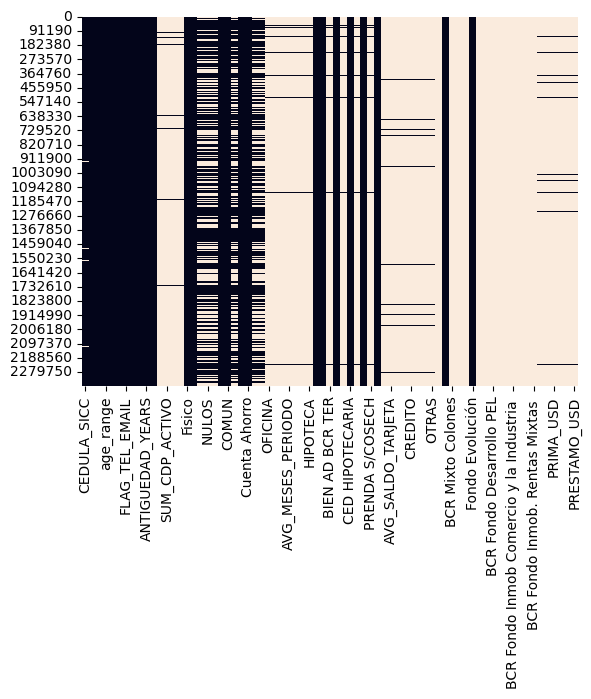

In [56]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

alternativa

<AxesSubplot:>

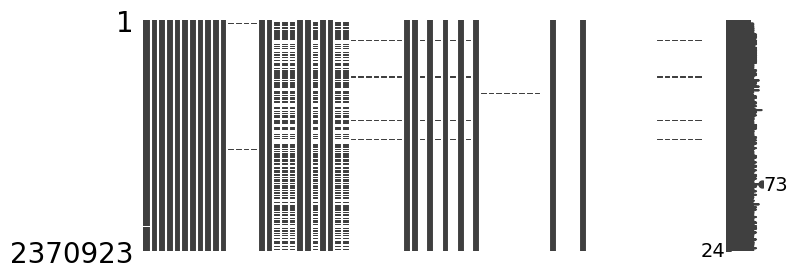

In [57]:
import missingno as msno
msno.matrix(df, figsize=(8,3))

<a id="section81"></a>
## <font color="#004D7F"> 8.3 correlación entre valores faltantes</font>

En este caso los que no tienen datos es porque no tienen suficientes datos faltantes para hacer el análisis. Es importante por que a partir de este se puede notar razones de porqué son faltantes

<AxesSubplot:>

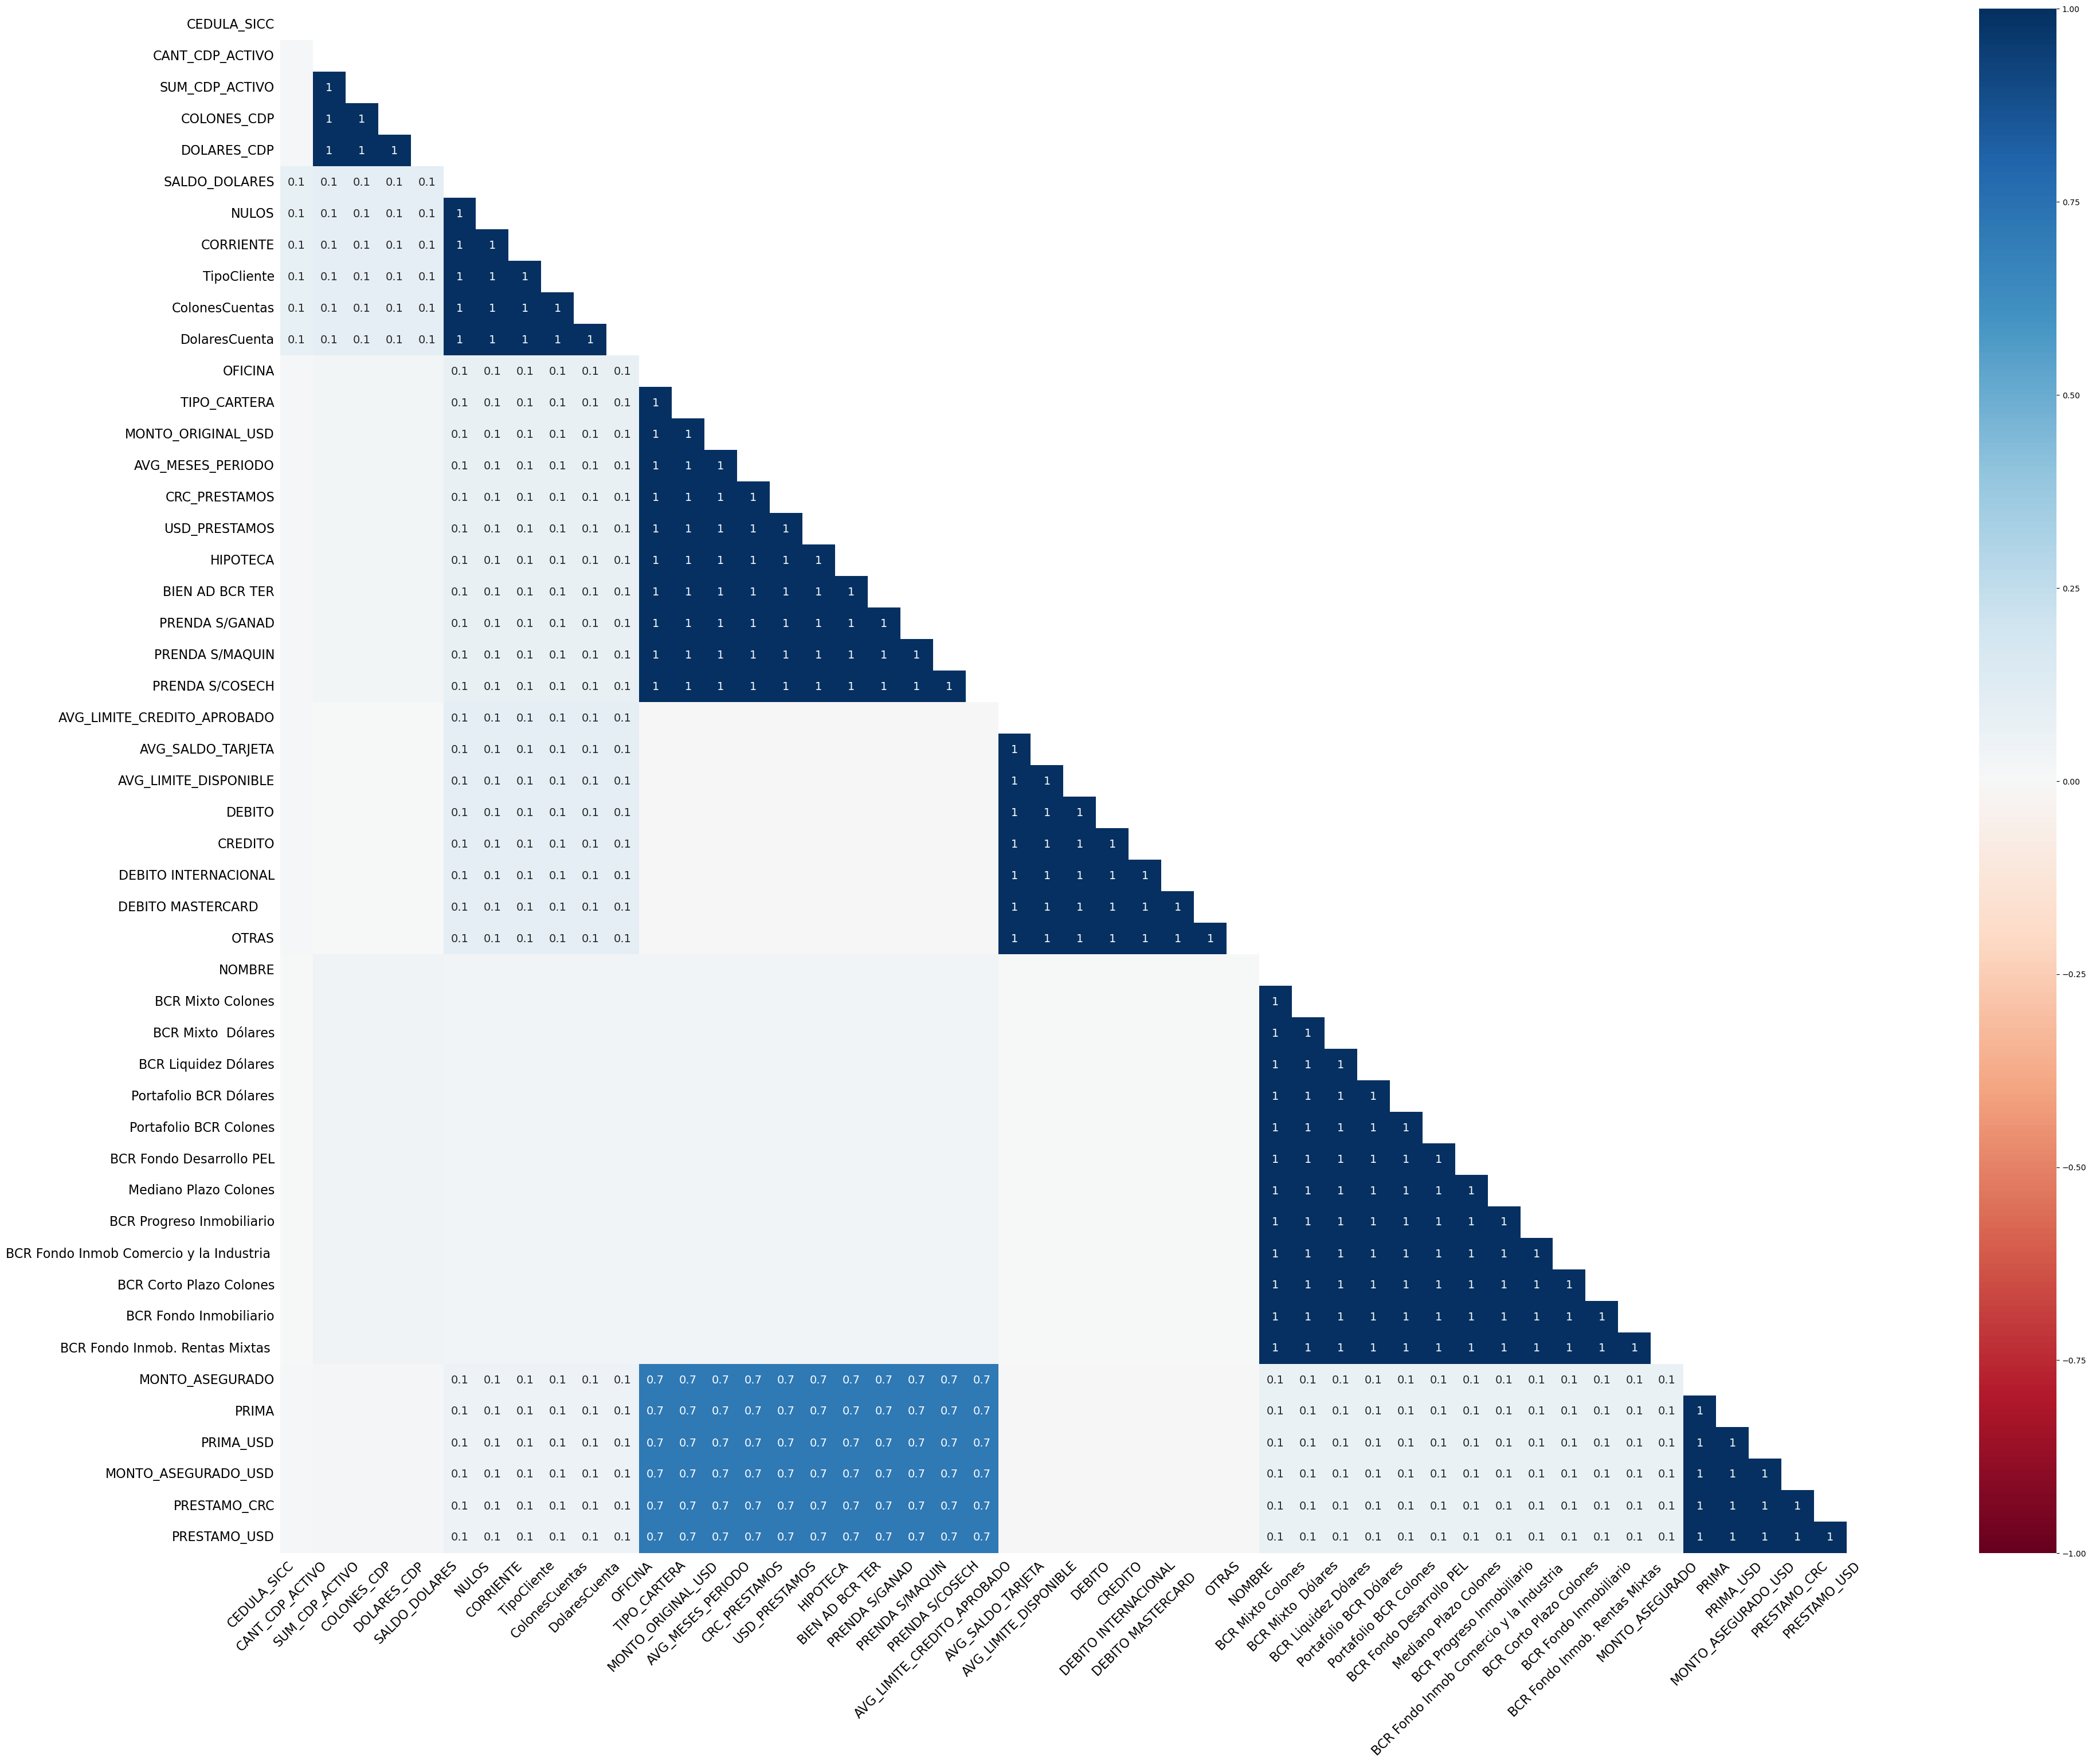

In [61]:
msno.heatmap(df, figsize=(45,35)) 

<a id="section9"></a>
# <font color="#004D7F"> 9. Matriz de Dispersión por clase</font>

In [79]:
df["DEBITO"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
2370918   NaN
2370919   NaN
2370920   NaN
2370921   NaN
2370922   NaN
Name: DEBITO, Length: 2370923, dtype: float64

Los puntos en una matriz de diagrama de dispersión pueden ser coloreados por la etiqueta de clase en problemas de clasificación. Esto puede ayudarnos a detectar una separación clara (o no clara) de las clases y quizás a darnos una idea de lo difícil que puede ser el problema.

Al igual que el anterior gráfico los diagramas están dados por la interacción de los pares de atributos pero, en este caso, teniendo en cuenta la etiqueta clase.

In [ ]:
%matplotlib inline
#sns.pairplot(df, hue="age_range")

In [46]:
%matplotlib inline

# Correlation boxplot for clases

# plt.figure(1)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="age_range", y="sepal.length", data=df)
# plt.title("sepal.length")
# plt.grid(True)

# plt.figure(2)
# plt.subplots(figsize=(10,10))
# plt.subplot(421)
# sns.boxplot(x="class", y="Sepal.width", data=df)
# plt.title("Sepal.width")
# plt.grid(True)


In [47]:
#Relación entre ...
# sns.catplot(x='sepal.length', y='Sepal.width', hue='class', kind = 'box', data = df)

<a id="section10"></a>
# <font color="#004D7F"> 10. Informe HTML de los datos</font>

Con el siguiente comando hacemos un reporte .html sobre cada una de las variables de la base, histograma y análisis individual

In [48]:
import sweetviz as sv
#analyzing the dataset
df_analysis=sv.analyze(df)
#show analysis as html
df_analysis.show_html('train_analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

MemoryError: 